# Exploratory Data Analysis Pt2

This is the second part of our data analysis. We wanted to seperate customers who bought multiple times and those that bought only once and find out what variables affect the return rate of the customers.

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
import re
sb.set() # set the default Seaborn style for graphics

# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Import KMeans from sklearn.cluster
from sklearn.cluster import KMeans

# Import LocalOutlierFactor from sklearn.neighbors
from sklearn.neighbors import LocalOutlierFactor

# Create a Linear Regression object
linreg = LinearRegression()

# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 2)

In [2]:
customers = pd.read_csv('olist_customers_dataset.csv')
orderitems = pd.read_csv('olist_order_items_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
productcat = pd.read_csv('product_category_name_translation.csv')

# Merging Data

Merge customers,orders,reviews,sellers and product categories

In [3]:
customersandorders = pd.merge(customers, orders, on = 'customer_id')
customersandorders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   customer_id                    99441 non-null  object
 1   customer_unique_id             99441 non-null  object
 2   customer_zip_code_prefix       99441 non-null  int64 
 3   customer_city                  99441 non-null  object
 4   customer_state                 99441 non-null  object
 5   order_id                       99441 non-null  object
 6   order_status                   99441 non-null  object
 7   order_purchase_timestamp       99441 non-null  object
 8   order_approved_at              99281 non-null  object
 9   order_delivered_carrier_date   97658 non-null  object
 10  order_delivered_customer_date  96476 non-null  object
 11  order_estimated_delivery_date  99441 non-null  object
dtypes: int64(1), object(11)
memory usage: 9.9+ MB


In [4]:
PCO = pd.merge(customersandorders, payments, on = 'order_id')
PCO.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103886 entries, 0 to 103885
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    103886 non-null  object 
 1   customer_unique_id             103886 non-null  object 
 2   customer_zip_code_prefix       103886 non-null  int64  
 3   customer_city                  103886 non-null  object 
 4   customer_state                 103886 non-null  object 
 5   order_id                       103886 non-null  object 
 6   order_status                   103886 non-null  object 
 7   order_purchase_timestamp       103886 non-null  object 
 8   order_approved_at              103711 non-null  object 
 9   order_delivered_carrier_date   101998 non-null  object 
 10  order_delivered_customer_date  100754 non-null  object 
 11  order_estimated_delivery_date  103886 non-null  object 
 12  payment_sequential            

In [5]:
PCO=PCO.drop_duplicates(subset=['order_id'])

In [6]:
PCOR=pd.merge(PCO,reviews,on='order_id')
PCOR=PCOR.drop_duplicates(subset=['order_id'])

In [7]:
PCORP=pd.merge(PCOR,orderitems,on='order_id')
PCORP=PCORP.drop_duplicates(subset=['order_id'])

In [8]:
PCORPP=pd.merge(PCORP,products,on='product_id')
PCORPP=PCORPP.drop_duplicates(subset=['order_id'])

In [9]:
new_data=pd.merge(PCORPP,productcat,on='product_category_name')

In [10]:
new_data=new_data.drop(columns=['customer_zip_code_prefix','order_approved_at','order_delivered_carrier_date','product_category_name',
                               'product_name_lenght','product_description_lenght','product_photos_qty','product_weight_g','product_length_cm',
                               'product_height_cm','product_width_cm'])

In [11]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97228 entries, 0 to 97227
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_id                    97228 non-null  object 
 1   customer_unique_id             97228 non-null  object 
 2   customer_city                  97228 non-null  object 
 3   customer_state                 97228 non-null  object 
 4   order_id                       97228 non-null  object 
 5   order_status                   97228 non-null  object 
 6   order_purchase_timestamp       97228 non-null  object 
 7   order_delivered_customer_date  95097 non-null  object 
 8   order_estimated_delivery_date  97228 non-null  object 
 9   payment_sequential             97228 non-null  int64  
 10  payment_type                   97228 non-null  object 
 11  payment_installments           97228 non-null  int64  
 12  payment_value                  97228 non-null 

In [12]:
new_data=new_data.drop(columns=['review_answer_timestamp','shipping_limit_date'])

In [13]:
new_data['order_purchase_timestamp'] = pd.to_datetime(new_data['order_purchase_timestamp'], format='%Y-%m-%d %H:%M:%S')

In [14]:
new_data['order_delivered_customer_date'] = pd.to_datetime(new_data['order_delivered_customer_date'], format='%Y-%m-%d %H:%M:%S')

In [15]:
delivery_time=new_data['order_delivered_customer_date']-new_data['order_purchase_timestamp']
delivery_time=delivery_time.dt.round("D")

In [16]:
new_data['delivery_time']=delivery_time

In [17]:
new_data.drop_duplicates(subset=['order_id'])

,customer_id,customer_unique_id,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,...,review_comment_title,review_comment_message,review_creation_date,order_item_id,product_id,seller_id,price,freight_value,product_category_name_english,delivery_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-25 10:35:35,2017-06-05 00:00:00,1,...,NaN,NaN,2017-05-26 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,124.99,21.88,office_furniture,9 days
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-28 00:09:50,2017-12-19 00:00:00,1,...,NaN,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,112.99,24.90,office_furniture,19 days
2,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-26 09:54:04,2017-06-12 00:00:00,1,...,NaN,"Produto compatível com seu valor, muito bonito...",2017-05-27 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,124.99,15.62,office_furniture,19 days
3,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-28 21:09:00,2018-03-22 00:00:00,1,...,NaN,Entregou antes do prazo,2018-03-01 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,106.99,30.59,office_furniture,25 days
4,fd3a0b1bd209f0e7d420c9c3d1127613,567ab47ca4deb92d46dbf54dce07d0a7,angelina,SC,574fe1739f65af76badd0999db300b4f,delivered,2017-03-23 15:10:17,2017-04-11 10:16:56,2017-04-24 00:00:00,1,...,NaN,NaN,2017-04-12 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,126.99,15.06,office_furniture,19 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97223,8325d6e7af2f2bfb58cf040729b232dd,a1d53377ab83871b0ad483b03ac69d6c,sao paulo,SP,b99217b1fcf2fdeace7b8d869b76cb91,delivered,2018-03-07 17:42:06,2018-03-15 22:04:49,2018-04-02 00:00:00,1,...,NaN,NaN,2018-03-16 00:00:00,1,57bdf3098169cccdb62221bd3e089cbd,d98eec89afa3380e14463da2aabaea72,39.99,10.15,fashion_childrens_clothes,8 days
97224,85485f38b20ed1e287120d30cf39ee7d,f979a07fc18b2af3780a796ba14b96f4,sao paulo,SP,9fa3a005f89a187501fa1bd63d6125fb,delivered,2017-10-08 23:51:49,2017-10-16 21:59:33,2017-11-08 00:00:00,1,...,NaN,NaN,2017-10-17 00:00:00,1,57bdf3098169cccdb62221bd3e089cbd,d98eec89afa3380e14463da2aabaea72,39.99,14.10,fashion_childrens_clothes,8 days
97225,14acb30bbc064408dcb8cdd3c92b0c97,1b553902a5bbe6ee54a3aaa7cbfb6816,nova iguacu,RJ,ee86b68eb9222b0cad7da50f4f758a35,delivered,2017-05-17 17:44:34,2017-05-20 08:44:01,2017-06-09 00:00:00,1,...,NaN,NaN,2017-05-21 00:00:00,1,0ab3ab3b2869073aa9afe795fe9151aa,28ea411b354f14b1a494be4e79f0ce02,110.00,14.52,fashion_childrens_clothes,3 days
97226,363d3a9b2ec5c5426608688ca033292d,d8bee9ec375c3a0f9ef8ed7456a51dcd,rolim de moura,RO,2c4ada2e75c2ad41dd93cebb5df5f023,delivered,2017-01-26 11:09:00,2017-02-14 16:24:01,2017-03-07 00:00:00,1,...,NaN,Envio muito rápido. Recomendo.,2017-02-15 00:00:00,1,6c7a0a349ad11817745e3ad58abd5c79,48162d548f5b1b11b9d29d1e01f75a61,183.29,25.77,security_and_services,19 days


In [18]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97228 entries, 0 to 97227
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   customer_id                    97228 non-null  object         
 1   customer_unique_id             97228 non-null  object         
 2   customer_city                  97228 non-null  object         
 3   customer_state                 97228 non-null  object         
 4   order_id                       97228 non-null  object         
 5   order_status                   97228 non-null  object         
 6   order_purchase_timestamp       97228 non-null  datetime64[ns] 
 7   order_delivered_customer_date  95097 non-null  datetime64[ns] 
 8   order_estimated_delivery_date  97228 non-null  object         
 9   payment_sequential             97228 non-null  int64          
 10  payment_type                   97228 non-null  object         
 11  pa

# Splitting into two different datasets

The approach is to seperate customers who had multiple purchases and single purchases. Try to find out which factor leads to higher purchase. Aim is for customers to return to purchase

In [19]:
comparison=pd.DataFrame(new_data.customer_unique_id.value_counts())
comparison

,customer_unique_id
8d50f5eadf50201ccdcedfb9e2ac8455,15
3e43e6105506432c953e165fb2acf44c,9
1b6c7548a2a1f9037c1fd3ddfed95f33,7
6469f99c1f9dfae7733b25662e7f1782,7
ca77025e7201e3b30c44b472ff346268,7
...,...
6cd850488c03016c07454bb7e184d779,1
f95ccde28c7613a61e9e40681cac6104,1
d4b57ec91daca087ba9b388cf42c205b,1
659bdc990055d4604a50cd848a43b9a3,1


In [20]:
multiple = comparison[comparison['customer_unique_id']>1].reset_index()
single = comparison[comparison['customer_unique_id'] == 1].reset_index()

In [21]:
multiple.rename(columns = {'index': 'customer_unique_id', 'customer_unique_id': 'count'}, inplace = True)
single.rename(columns = {'index': 'customer_unique_id', 'customer_unique_id': 'count'}, inplace = True)

In [22]:
Single_purchase=pd.merge(single,new_data, on = 'customer_unique_id')
Multiple_purchase=pd.merge(multiple,new_data, on = 'customer_unique_id')
Multiple_purchase

,customer_unique_id,count,customer_id,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,...,review_comment_title,review_comment_message,review_creation_date,order_item_id,product_id,seller_id,price,freight_value,product_category_name_english,delivery_time
0,8d50f5eadf50201ccdcedfb9e2ac8455,15,6289b75219d757a56c0cce8d9e427900,sao paulo,SP,6bdf325f0966e3056651285c0aed5aad,delivered,2018-05-22 23:08:55,2018-05-24 11:58:23,2018-05-30 00:00:00,...,NaN,NaN,2018-05-25 00:00:00,1,d6354128c28cc56532ba7393d9373083,412a4720f3e9431b4afa1476a1acddbe,51.80,11.15,sports_leisure,2 days
1,8d50f5eadf50201ccdcedfb9e2ac8455,15,1bd3585471932167ab72a84955ebefea,sao paulo,SP,b850a16d8faf65a74c51287ef34379ce,delivered,2017-11-22 20:01:53,2017-11-27 18:49:13,2017-12-04 00:00:00,...,NaN,NaN,2017-11-28 00:00:00,1,5bccc8fe44471df6c7b7e08176837d2f,1da3aeb70d7989d1e6d9b0e887f97c23,13.99,7.78,sports_leisure,5 days
2,8d50f5eadf50201ccdcedfb9e2ac8455,15,a8fabc805e9a10a3c93ae5bff642b86b,sao paulo,SP,23427a6bd9f8fd1b51f1b1e5cc186ab8,delivered,2018-05-21 22:44:31,2018-05-23 15:33:09,2018-05-29 00:00:00,...,NaN,NaN,2018-05-24 00:00:00,1,5cb96c51c55f57503465e4d2558dc053,db4350fd57ae30082dec7acbaacc17f9,45.99,7.39,sports_leisure,2 days
3,8d50f5eadf50201ccdcedfb9e2ac8455,15,897b7f72042714efaa64ac306ba0cafc,sao paulo,SP,c2213109a2cc0e75d55585b7aaac6d97,delivered,2018-08-07 23:32:14,2018-08-10 20:26:44,2018-08-13 00:00:00,...,NaN,NaN,2018-08-11 00:00:00,1,de7df82eb1e48c456b020c2cfb03aeed,1da3aeb70d7989d1e6d9b0e887f97c23,26.99,7.45,sports_leisure,3 days
4,8d50f5eadf50201ccdcedfb9e2ac8455,15,b2b13de0770e06de50080fea77c459e6,sao paulo,SP,369634708db140c5d2c4e365882c443a,delivered,2017-06-18 22:56:48,2017-06-23 12:55:50,2017-07-07 00:00:00,...,NaN,NaN,2017-06-25 00:00:00,1,d83509907a19c72e1e4cdde78b8177ec,94e93ce877be27a515118dbfd2c2be41,39.90,11.85,sports_leisure,5 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6008,f944ee56d8467517955c2ddc7b0d486a,2,774858779c1de29d2be62401459a8ca0,jaragua do sul,SC,0bcde0684eba5746bbb90d6d9089570a,delivered,2017-11-01 20:57:34,2017-11-13 19:23:46,2017-11-24 00:00:00,...,NaN,A embalagem do produto é um pouco diferente ma...,2017-11-14 00:00:00,1,32aeecc02aa5adcb7f75155a80a47836,df56d7b40d437f88407c5f78b63bc328,138.50,16.73,sports_leisure,12 days
6009,7d35f5764e668c9deade51c2fd31758a,2,0ae2a7fe487a9e59d21a1413570cae2e,santa luzia,MG,9aecb82bfe0db20de65127f00bbb158f,delivered,2018-02-05 14:39:00,2018-02-14 21:09:19,2018-03-05 00:00:00,...,NaN,NaN,2018-02-20 00:00:00,1,00250175f79f584c14ab5cecd80553cd,b499c00f28f4b7069ff6550af8c1348a,79.99,15.31,housewares,9 days
6010,7d35f5764e668c9deade51c2fd31758a,2,ac1a389528fe61d073b809c5cd02d95a,santa luzia,MG,fa3d745324c8a96e112e217b025689f1,delivered,2018-02-05 14:38:57,2018-02-19 16:04:36,2018-03-13 00:00:00,...,NaN,NaN,2018-02-20 00:00:00,1,48e82f62f499350869ac7529efd9fcbd,cca3071e3e9bb7d12640c9fbe2301306,54.90,16.14,furniture_decor,14 days
6011,a366793a4999f8cc135855c4dd347421,2,ec44c35c1f4142d89e506f87f9ffc183,sao paulo,SP,bcdd99725db7d4c2fd9468f0fcf3cfa1,delivered,2018-02-16 22:02:09,2018-03-03 10:32:10,2018-03-06 00:00:00,...,NaN,NaN,2018-03-04 00:00:00,1,270447c8593b4b89e594781f9f1aff84,e62b2d6ac10570a035a30bafcf01d263,135.90,12.16,furniture_decor,15 days


# Checking Review Score

<Figure size 1152x576 with 0 Axes>

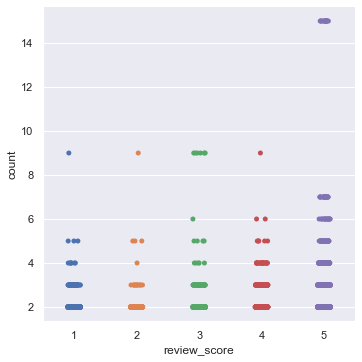

In [23]:
plt.figure(figsize = (16, 8))
sb.catplot(data=Multiple_purchase,x='review_score',y='count')

<AxesSubplot:xlabel='review_score', ylabel='Count'>

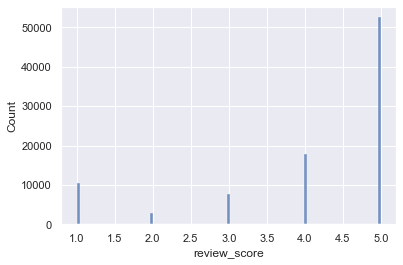

In [24]:
sb.histplot(data=Single_purchase, x='review_score')

# Comparing Popular Products

In [25]:
popularproducts=pd.DataFrame(Multiple_purchase.product_category_name_english.value_counts()).reset_index()
popularproducts.rename(columns = {'index': 'product_category_name_english', 'product_category_name_english': 'count'}, inplace = True)
popularproducts

,product_category_name_english,count
0,bed_bath_table,837
1,sports_leisure,595
2,furniture_decor,566
3,health_beauty,502
4,computers_accessories,408
...,...,...
63,diapers_and_hygiene,2
64,fashion_childrens_clothes,1
65,fashion_sport,1
66,party_supplies,1


In [26]:
popularproducts = popularproducts[popularproducts['count']>20]

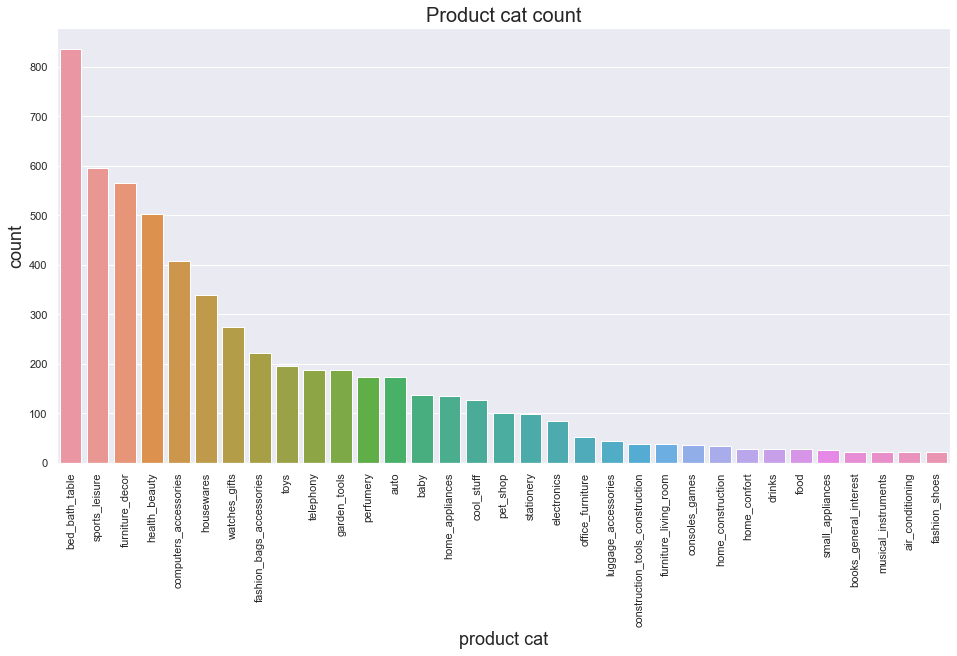

In [27]:

plt.figure(figsize = (16, 8))
plt.ioff()

popularproducts_plot = sb.barplot(x = "product_category_name_english", y = "count", data = popularproducts)

popularproducts_plot.set_xticklabels(labels = popularproducts['product_category_name_english'].unique(), rotation = 90)
plt.xlabel("product cat", fontsize = 18)
plt.ylabel("count", fontsize = 18)
plt.title("Product cat count", fontsize = 20)
plt.ioff()

plt.show(popularproducts_plot)

In [28]:
Multiple_purchase.product_category_name_english.value_counts(normalize= True)

bed_bath_table                           0.139198
sports_leisure                           0.098952
furniture_decor                          0.094129
health_beauty                            0.083486
computers_accessories                    0.067853
                                           ...   
diapers_and_hygiene                      0.000333
fashion_childrens_clothes                0.000166
fashion_sport                            0.000166
party_supplies                           0.000166
small_appliances_home_oven_and_coffee    0.000166
Name: product_category_name_english, Length: 68, dtype: float64

In [29]:
Single_purchase.product_category_name_english.value_counts(normalize= True)

bed_bath_table               0.092901
health_beauty                0.090917
sports_leisure               0.077685
computers_accessories        0.068541
furniture_decor              0.063465
                               ...   
arts_and_craftmanship        0.000186
cds_dvds_musicals            0.000132
la_cuisine                   0.000110
fashion_childrens_clothes    0.000077
security_and_services        0.000022
Name: product_category_name_english, Length: 71, dtype: float64

In [30]:
popularproducts_single=pd.DataFrame(Single_purchase.product_category_name_english.value_counts()).reset_index()
popularproducts_single.rename(columns = {'index': 'product_category_name_english', 'product_category_name_english': 'count'}, inplace = True)
popularproducts_single

,product_category_name_english,count
0,bed_bath_table,8474
1,health_beauty,8293
2,sports_leisure,7086
3,computers_accessories,6252
4,furniture_decor,5789
...,...,...
66,arts_and_craftmanship,17
67,cds_dvds_musicals,12
68,la_cuisine,10
69,fashion_childrens_clothes,7


In [31]:
popularproducts_single = popularproducts_single[popularproducts_single['count']>50]

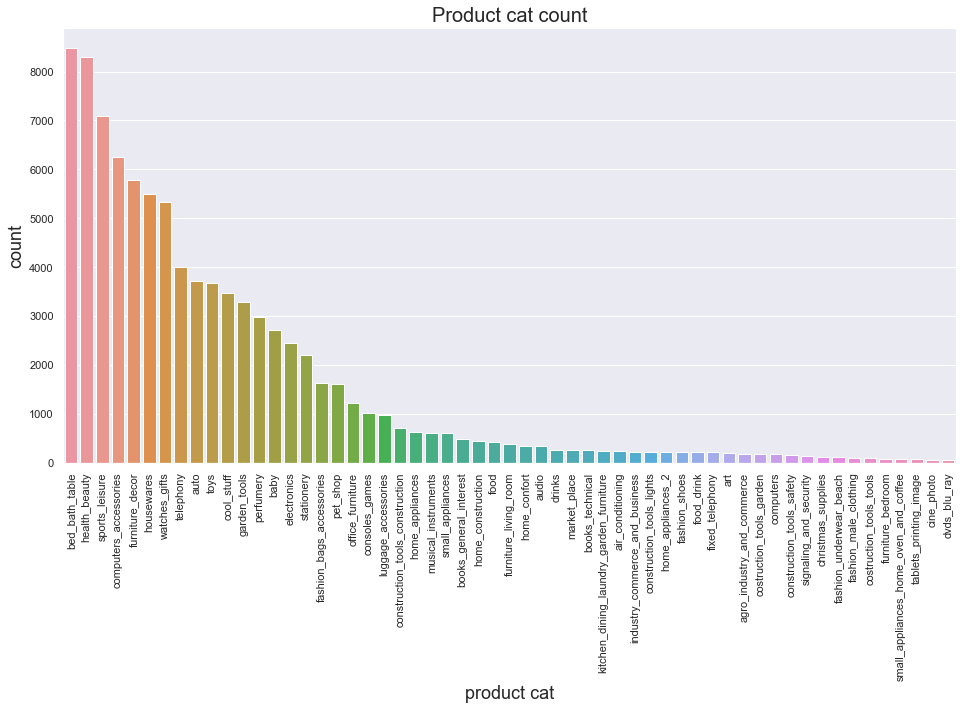

In [32]:
plt.figure(figsize = (16, 8))
plt.ioff()

popularproducts_plot = sb.barplot(x = "product_category_name_english", y = "count", data = popularproducts_single)

popularproducts_plot.set_xticklabels(labels = popularproducts_single['product_category_name_english'].unique(), rotation = 90)
plt.xlabel("product cat", fontsize = 18)
plt.ylabel("count", fontsize = 18)
plt.title("Product cat count", fontsize = 20)
plt.ioff()

plt.show(popularproducts_plot)

In [33]:
Single_purchase.product_category_name_english.value_counts(normalize= True)

bed_bath_table               0.092901
health_beauty                0.090917
sports_leisure               0.077685
computers_accessories        0.068541
furniture_decor              0.063465
                               ...   
arts_and_craftmanship        0.000186
cds_dvds_musicals            0.000132
la_cuisine                   0.000110
fashion_childrens_clothes    0.000077
security_and_services        0.000022
Name: product_category_name_english, Length: 71, dtype: float64

# Comparing Delivery Time

In [34]:
Multiple_purchase['delivery_time']

0       2 days
1       5 days
2       2 days
3       3 days
4       5 days
         ...  
6008   12 days
6009    9 days
6010   14 days
6011   15 days
6012    5 days
Name: delivery_time, Length: 6013, dtype: timedelta64[ns]

In [35]:
Multiple_purchase['delivery_time'].fillna(pd.Timedelta('0 days'), inplace =True)
Multiple_purchase['delivery_time'].describe()

count                          6013
mean     12 days 01:05:37.069682354
std       8 days 14:44:00.529430215
min                 0 days 00:00:00
25%                 6 days 00:00:00
50%                10 days 00:00:00
75%                15 days 00:00:00
max                88 days 00:00:00
Name: delivery_time, dtype: object

In [37]:
Multiple_purchase['delivery_time'] = Multiple_purchase['delivery_time'].dt.days.astype('int16')


<AxesSubplot:>

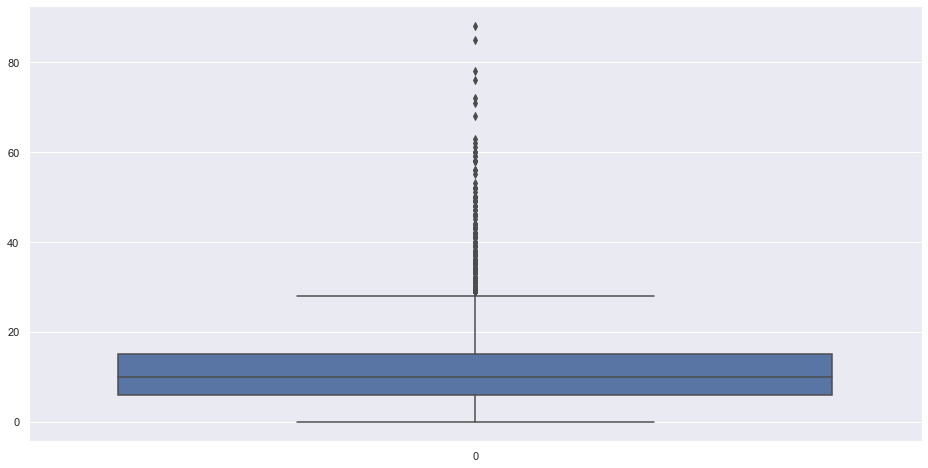

In [38]:
plt.figure(figsize = (16, 8))
sb.boxplot(data=Multiple_purchase['delivery_time'])

In [39]:
Single_purchase['delivery_time'].fillna(pd.Timedelta('0 days'), inplace =True)
Single_purchase['delivery_time'].describe()

count                         91215
mean     12 days 06:04:53.872718302
std       9 days 16:19:53.888550423
min                 0 days 00:00:00
25%                 6 days 00:00:00
50%                10 days 00:00:00
75%                15 days 00:00:00
max               210 days 00:00:00
Name: delivery_time, dtype: object

In [40]:
Single_purchase['delivery_time'] = Single_purchase['delivery_time'].dt.days.astype('int16')

<AxesSubplot:>

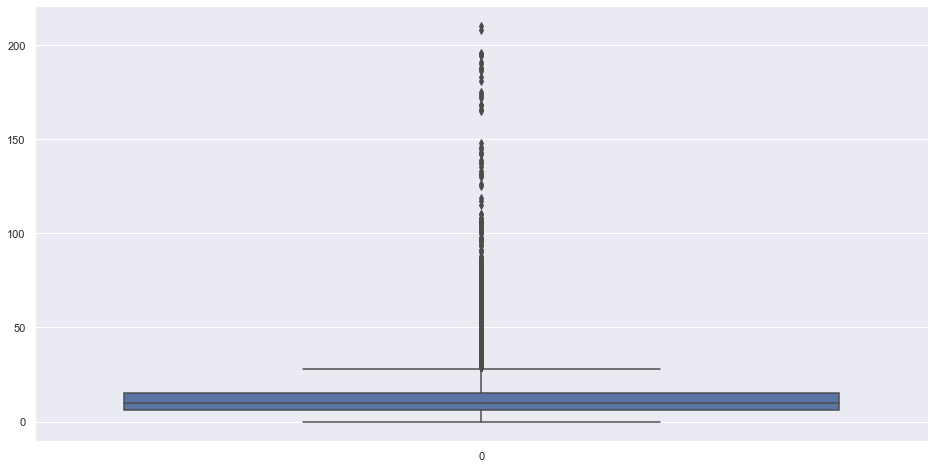

In [41]:
plt.figure(figsize = (16, 8))
sb.boxplot(data=Single_purchase['delivery_time'])

In [42]:
df=new_data.seller_id.value_counts()

In [43]:
Multiple_purchase['freight_value'].describe()

count    6013.000000
mean       19.108194
std        13.305653
min         0.000000
25%        12.830000
50%        16.110000
75%        20.190000
max       196.940000
Name: freight_value, dtype: float64

In [44]:
Single_purchase['freight_value'].describe()

count    91215.000000
mean        20.313844
std         16.099995
min          0.000000
25%         13.370000
50%         16.450000
75%         21.350000
max        409.680000
Name: freight_value, dtype: float64

In [45]:
Single_purchase[Single_purchase['freight_value']>409]['review_score']

34692    5
Name: review_score, dtype: int64

<AxesSubplot:>

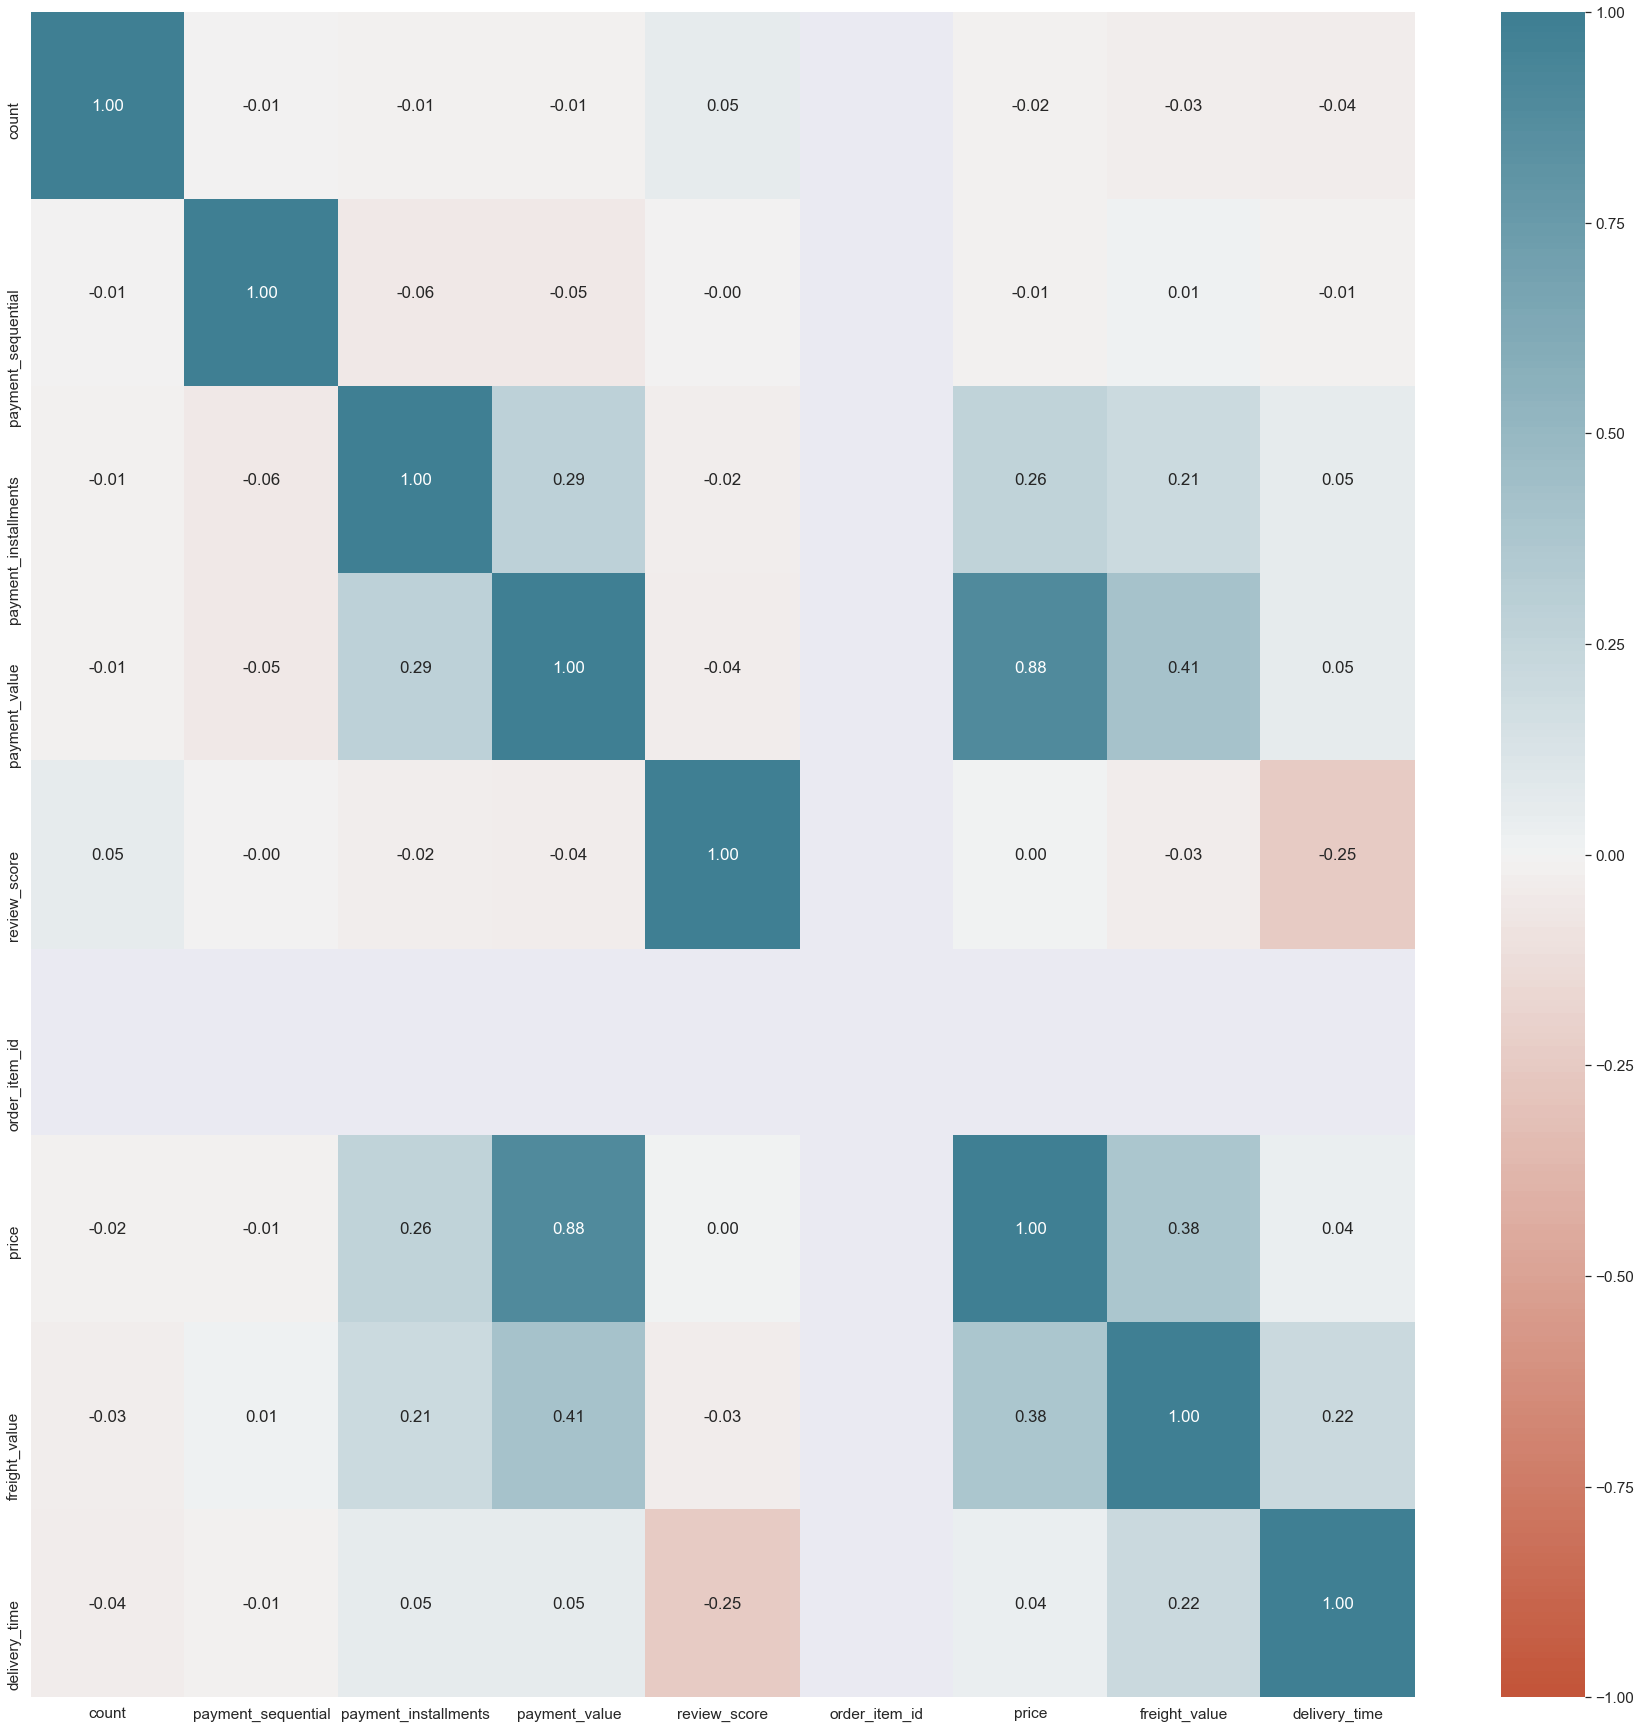

In [47]:
plt.figure(figsize=(31,31))
sb.set(font_scale=1.4)
corr=Multiple_purchase.corr()
sb.heatmap(corr,vmin=-1, vmax=1, center=0, cmap=sb.diverging_palette(20,220, n=200), annot=True, fmt=".2f")

# Conclusion and Observations

After looking through the comaprisons between variables in the two datasets, we realise that there were no variables that showed distinct differences between those who purchased multiple times and those who purchased only once.